## Import Library

In [2]:
#menghilangkan warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Membaca dan mencari info data

In [4]:
#read data
df = pd.read_csv('/content/drive/MyDrive/PZIB 2023/Tugas Data Analyst/Tugas 5-6/Telco-Customer-Churn.csv')

In [5]:
#memunculkan beberapa data teratas
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
#untuk mengetahui informasi mengenai dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#untuk mengetahui dimensi dataframe
df.shape

(7043, 21)

## **1. Missing Values Checking**

In [ ]:
#ubah tipe data menjadi data kategori
df['SeniorCitizen'] = df['SeniorCitizen'].astype("category")

In [ ]:
#cek unique data pada variabel SeniorCitizen untuk memastikan apakah variabel tersebut bertipe data kategori
df[['SeniorCitizen']].describe()

,SeniorCitizen
count,7043
unique,2
top,0
freq,5901


In [ ]:
#cek kembali apakah tipe datanya sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [ ]:
#cek missing value pada variabel TotalCharges karena saat akan di ubah tipe data ke float, ditemukan error converting value ''
#dicari missing valuenya ada di index mana saja
for index, value in df['TotalCharges'].iteritems():
  try:
    float_value = float (value)
    df.at[index, 'TotalCharges'] = float_value
  except ValueError:
    print(f"Error converting value '{value}' to float at index {index}")

Error converting value ' ' to float at index 488
Error converting value ' ' to float at index 753
Error converting value ' ' to float at index 936
Error converting value ' ' to float at index 1082
Error converting value ' ' to float at index 1340
Error converting value ' ' to float at index 3331
Error converting value ' ' to float at index 3826
Error converting value ' ' to float at index 4380
Error converting value ' ' to float at index 5218
Error converting value ' ' to float at index 6670
Error converting value ' ' to float at index 6754


In [ ]:
#melihat missing value pada variabel Total Charges
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#mengubah nilai ' ' menjadi NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)

In [ ]:
#mencari jumlah missing value pada setiap variabel
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#karena missing value hanya ada pada variabel TotalCharges dan jumlahnya hanya sedikit, 
#maka data yang memiliki missing value akan dibuang
df = df.dropna()

In [ ]:
#cek kembali apakah missing valuenya sudah hilang
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#cek apakah tipe data variabel TotalCharges sudah berubah menjadi float
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 n

## **2. Categorical Data Encoding**

In [ ]:
#membuat dataframe baru dimana variabel yang tipe datanya sudah benar (tidak perlu dilakukan category encoding) akan dikeluarkan
df_cols = df.drop(['customerID', 'tenure','MonthlyCharges','TotalCharges'], axis=1).copy().columns.tolist()

#looping print list nama kolom dan unique value dari masing-masing kolom
for index in df_cols:
  unique_value = ', '.join(df[index].unique().astype(str))
  print(index + ': ' + unique_value)

gender: Female, Male
SeniorCitizen: 0, 1
Partner: Yes, No
Dependents: No, Yes
PhoneService: No, Yes
MultipleLines: No phone service, No, Yes
InternetService: DSL, Fiber optic, No
OnlineSecurity: No, Yes, No internet service
OnlineBackup: Yes, No, No internet service
DeviceProtection: No, Yes, No internet service
TechSupport: No, Yes, No internet service
StreamingTV: No, Yes, No internet service
StreamingMovies: No, Yes, No internet service
Contract: Month-to-month, One year, Two year
PaperlessBilling: Yes, No
PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
Churn: No, Yes


In [ ]:
#membuat dataframe baru yaitu df_new dengan mengeluarkan variabel customerID
df_new = df.drop(['customerID'], axis=1).copy()
#mengubah data kategori dengan menggunakan metode dummy encoding
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.head(10)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
5,8,99.65,820.50,0,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
6,22,89.10,1949.40,1,0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,0,0
7,10,29.75,301.90,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,28,104.80,3046.05,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
9,62,56.15,3487.95,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#menggabungkan variabel customerID dengan semua variabel pada dataframe df_new
df = pd.concat([df['customerID'], df_new],axis=1)
df

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,1,0,1,1,1,0,...,1,0,1,1,0,1,0,0,1,0
7039,2234-XADUH,72,103.20,7362.90,0,0,1,1,1,0,...,1,0,1,1,0,1,1,0,0,0
7040,4801-JZAZL,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,1


In [ ]:
#cek apakah tipe data sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   uint8  
 5   SeniorCitizen_1                        7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

## **3. Anomalies and Outlier Handling**



In [ ]:
#membuat dataframe baru yang berisi semua variabel dengan tipe data numerik (murni numerik sejak awal)
df_num = df[['tenure', 'MonthlyCharges','TotalCharges']]
df_num

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
#cek apakah terdapat perbedaan yang jauh antara nilai minimum atau maksimum terhadap nilai median
df_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<Axes: >

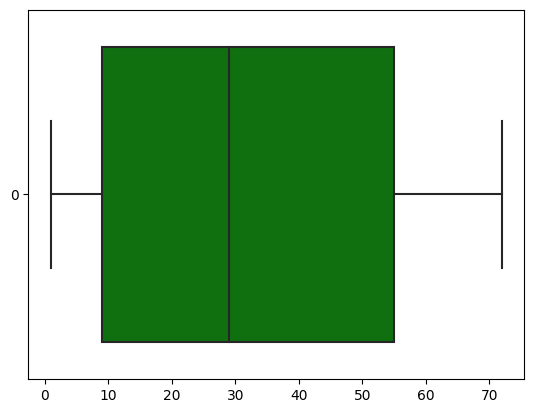

In [ ]:
#cek boxplot untuk variabel tenure
sns.boxplot(df['tenure'],color='green',orient='h')

<Axes: >

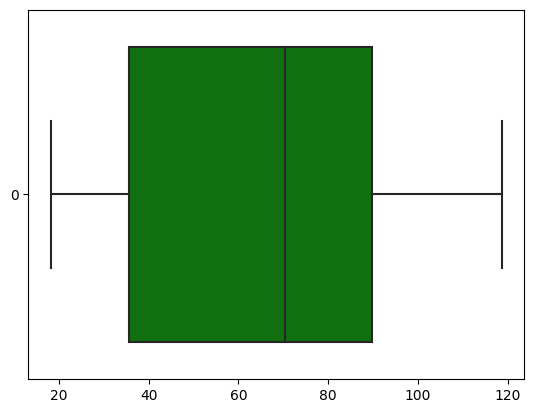

In [ ]:
#cek boxplot untuk variabel MonthlyCharges
sns.boxplot(df['MonthlyCharges'], color='green', orient='h')

<Axes: >

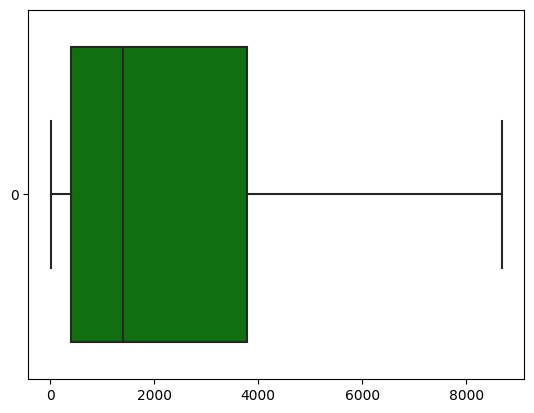

In [ ]:
#cek boxplot untuk variabel TotalCharges
sns.boxplot(df['TotalCharges'], color='green', orient='h')

In [ ]:
#cek nilai outliner semua variabel pada dataframe df_num
def find_outlier(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)
    
    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)
    
    return outlier

def show_outlier(data, variables):
    return pd.DataFrame({
        "outliers": [len(j) for j in [find_outlier(data[i]) for i in variables]],
        "percentage": np.array([len(j) for j in [find_outlier(data[i]) for i in variables]]) / len(data) * 100
    }).set_index([variables]).sort_values("outliers", ascending=False)

show_outlier(df_num, df_num.columns)

,outliers,percentage
tenure,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0
